## Assignment A1: Evaluate a machine learning model using Regression

### TASK 1: Dataset Selection and Preprocessing

The dataset selected for this assignment is "Life Expectancy (WHO)". It is a compilation of World Health Organization(WHO) data for 193 nations between 2000 and 2015 that includes details on life expectancy and other health indicators. My goal is to build a machine learning model that can estimate a person's lifespan based on some input features. This is a type of regression model, where I'll try to predict a continuous value. The dataset consists of 22 attributes and 2938 records, out of which 20 are taken to be predicting variables. All predicting variables are based on several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors. 'Life expectancy' attribute is chosen as the outcome variable for the regression analysis. Given that the observations in this dataset are based on data from several nations, it will be simpler for a nation to identify the predictive factor that is causing a decline in life expectancy. This will assist in advising a nation on which areas to prioritize in order to effectively raise the average life expectancy of its citizens.

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import all necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the Dataset
life_exp_df = pd.read_csv(r"/Users/payalchavan/Downloads/Life Expectancy Data.csv")
life_exp_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#Take a look at the data structure
life_exp_df.shape

(2938, 22)

In [5]:
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
life_exp_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Data Preprocessing & Cleaning

In [7]:
#Checking for missing values in the dataset
life_exp_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
#Checking for duplicate records in the dataset
life_exp_df.duplicated().any()

False

In [9]:
#Checking for numeric columns in the dataset
life_exp_df.select_dtypes(include = ['int64', 'float64']).columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
#Checking for category columns in the dataset
life_exp_df.select_dtypes(include = ['object']).columns

Index(['Country', 'Status'], dtype='object')

In [11]:
#Some column names have white spaces at start and end, we need to remove them
life_exp_df.columns = life_exp_df.columns.str.strip()

In [12]:
#If there are any missing values, we will fill them with the mean of the column
numeric_columns = life_exp_df.select_dtypes(include=[np.number]).columns
life_exp_df[numeric_columns] = life_exp_df[numeric_columns].fillna(life_exp_df[numeric_columns].mean())

In [13]:
#Checking for outliers using the Z-score method
from scipy import stats
z_scores = stats.zscore(life_exp_df.select_dtypes(include=[np.number]))

In [14]:
#The threshold for an outlier is usually a Z-score of 3 or -3, i.e., data points that are 3 standard deviations away from the mean
life_exp_df = life_exp_df[(z_scores < 3).all(axis=1)]

In [15]:
#Checking and correcting incorrect data types
#We will convert all numerical columns to float type and categorical columns to category type
for column in life_exp_df.columns:
    if life_exp_df[column].dtype == np.number:
        life_exp_df[column] = life_exp_df[column].astype(float)
    elif life_exp_df[column].dtype == object:
        life_exp_df[column] = life_exp_df[column].astype('category')

In [16]:
#Display the cleaned dataframe
life_exp_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9


In [17]:
#Check again for any missing values in the cleaned dataframe
life_exp_df.isnull().sum().sum()

0

### Exploratory Data Analysis

In [18]:
#Summary Statistics of the dataframe
summary_stats = life_exp_df.describe()
print(summary_stats)

              Year  Life expectancy  Adult Mortality  infant deaths  \
count  2599.000000      2599.000000      2599.000000    2599.000000   
mean   2007.564063        69.498153       159.866630      15.546749   
std       4.650076         8.808475       110.145126      31.711362   
min    2000.000000        41.000000         1.000000       0.000000   
25%    2003.000000        63.950000        76.000000       0.000000   
50%    2008.000000        72.200000       145.000000       3.000000   
75%    2012.000000        75.400000       225.000000      17.000000   
max    2015.000000        89.000000       527.000000     372.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles  \
count  2599.000000             2599.000000  2599.000000   2599.000000   
mean      4.493311              458.841709    81.647453   1052.699500   
std       3.840312             1016.496200    22.315501   3526.010122   
min       0.010000                0.000000     1.000000      0.00000

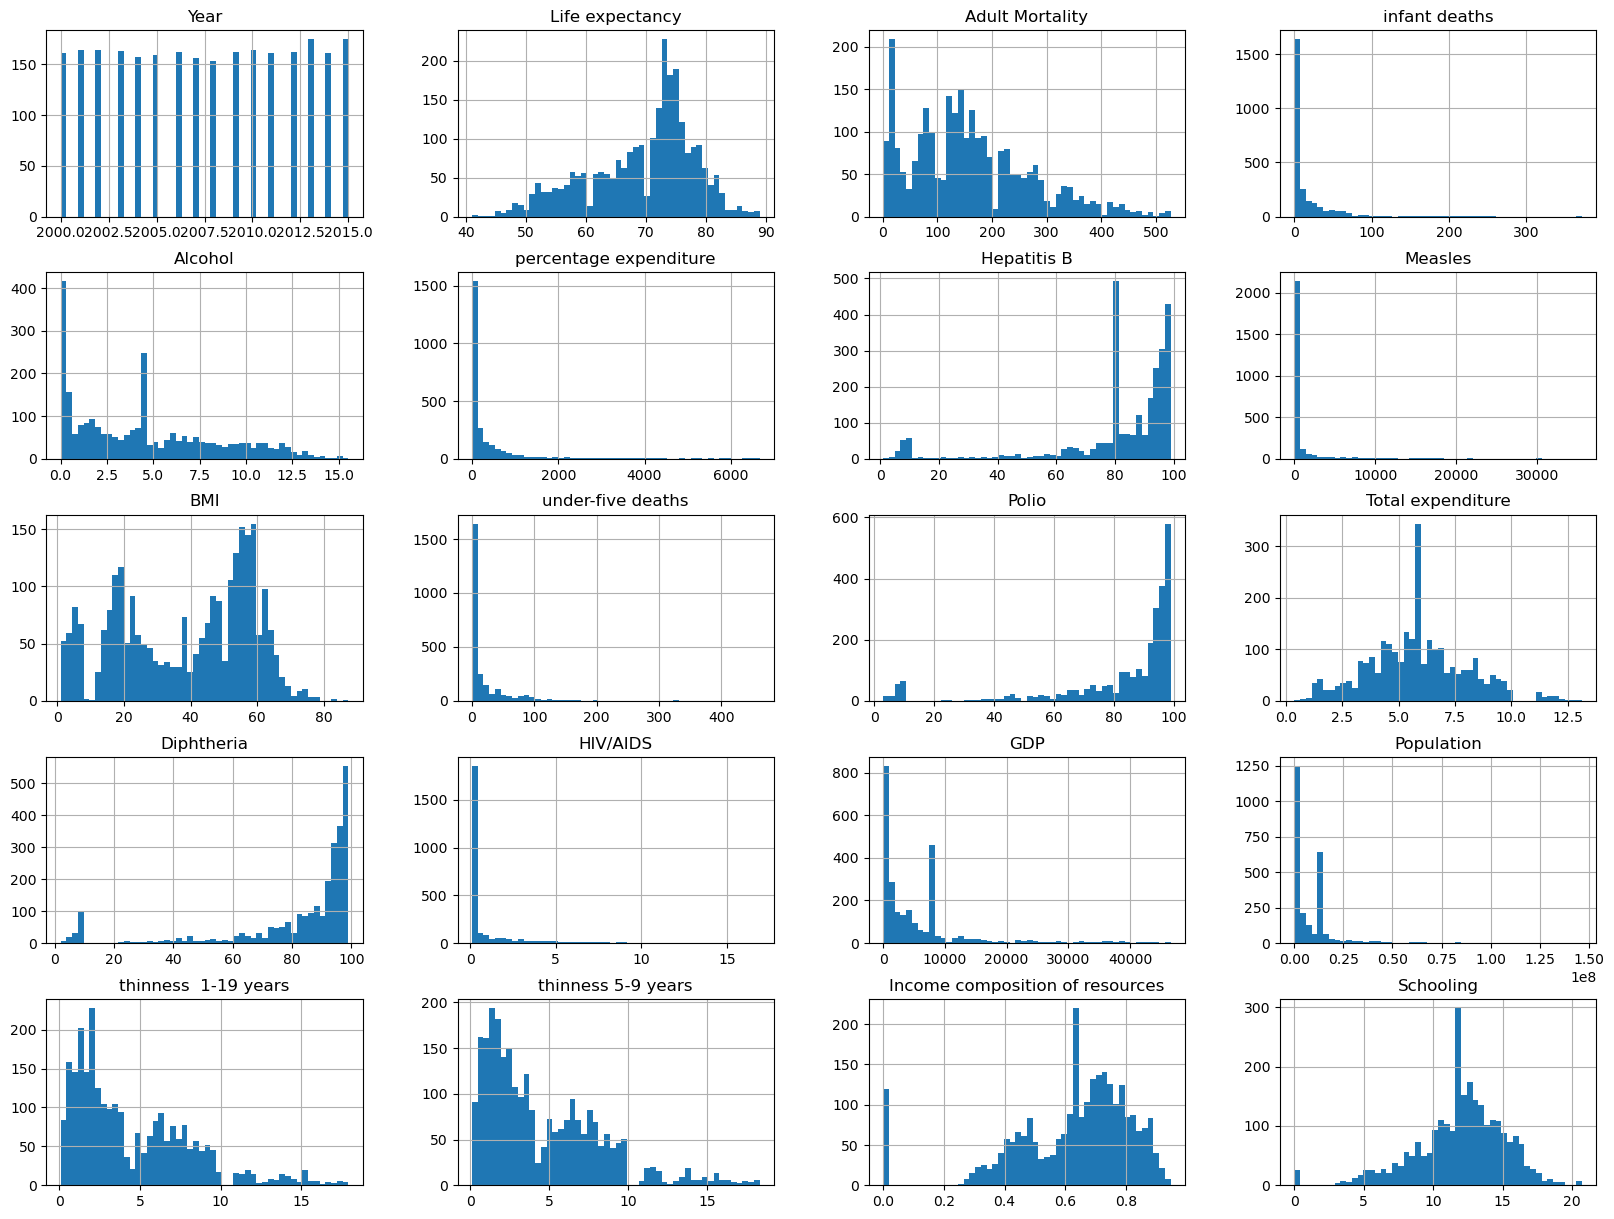

In [19]:
#Histograms for each attribute
life_exp_df.hist(bins=50, figsize=(20,15))
plt.show()

Insights: The following histograms suggest that a normal or bell-shaped distribution is displayed by certain measures, such as GDP per capita, adult mortality, and life expectancy, indicating that the majority of values are concentrated around the mean or average. This implies that there is significant variety among countries or areas and that these metrics are influenced by a multitude of factors. A skewed or asymmetrical distribution is seen in several variables, such as infant mortality, under-five fatalities, and HIV/AIDS prevalence, when the majority of values are concentrated at one end of the range. This implies that there is little variance in these indicators between nations or areas and that they are impacted by a small number of causes. Certain indicators have a bimodal or two-peaked distribution, indicating the presence of two separate groups of values, such as alcohol consumption, and total health expenditure. This implies that certain categorical or binary factors, like culture, religion, or legislation, have an impact on these measures. Certain indicators have a uniform or flat distribution, which means that the values are uniformly distributed across the range. Examples of these indicators include BMI distribution, and income composition of resources. This implies that these metrics are either level across nations or regions or are not affected by any major variables.

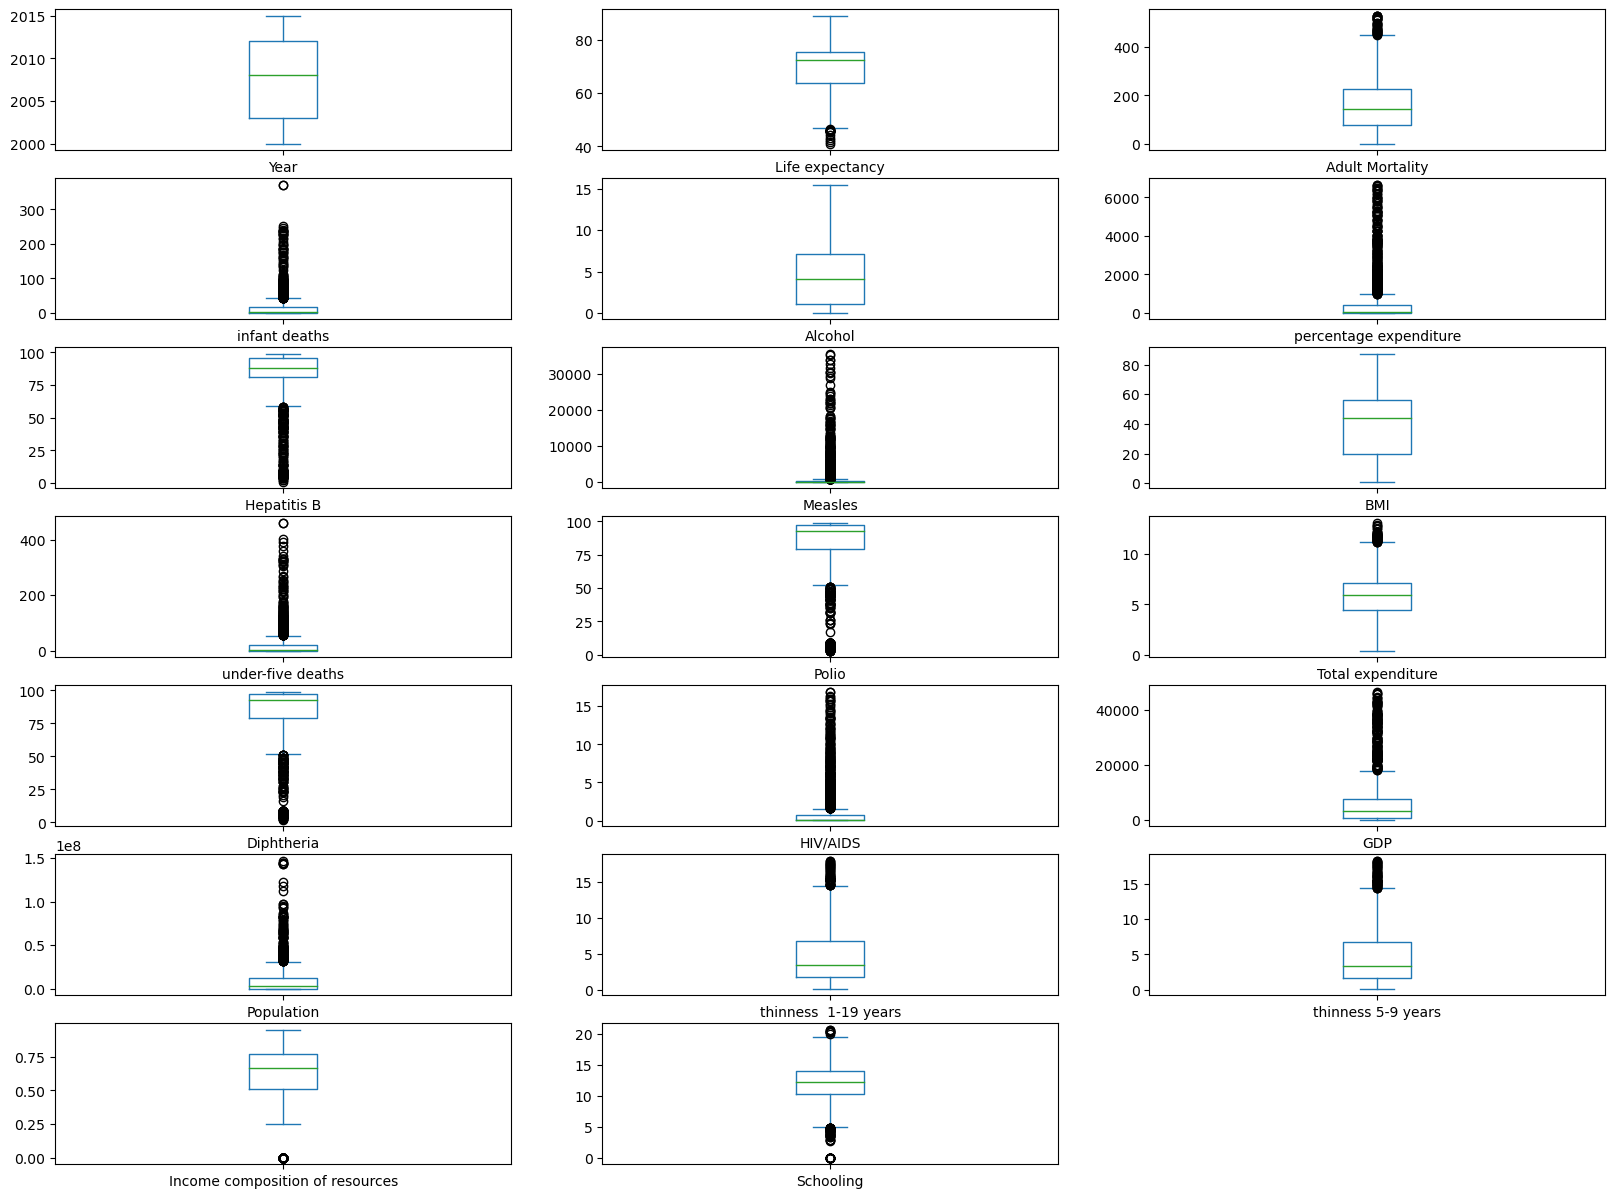

In [20]:
#Box plots for each attribute
life_exp_df.plot(kind='box', subplots=True, layout=(life_exp_df.shape[1]//3,3), figsize=(20,15))
plt.show()

Insights: Every boxplot displays the range and variance of a certain metric, such as GDP, adult mortality, and life expectancy, among others. Life expectancy exhibits an increasing trend over time, indicating that later years have higher values for both the upper quartile and median. This implies that most nations or regions have seen improvements in these metrics throughout time. The median and lower quartile values are lower in later years due to decreasing trends in other indicators, such as adult mortality and alcohol. This implies that for the majority of nations or areas, these indicators have decreased over time. Certain measures, including infant and under-five mortality rates, exhibit a stable trend across time, indicating that there is little variation in the median and quartile values over time. This implies that for the majority of nations or areas, these indicators have not changed throughout time.

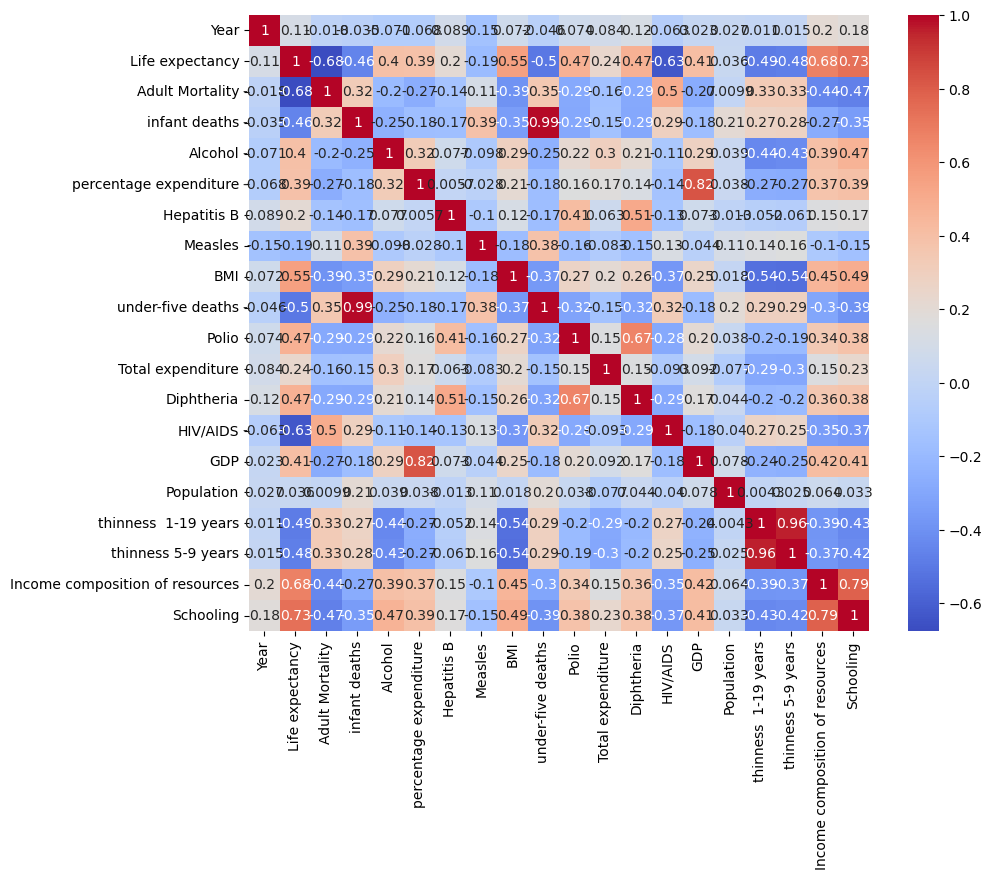

In [21]:
#Correlation matrix
#Exclude non-numerical columns from the correlation matrix calculation
numeric_columns = life_exp_df.select_dtypes(include=[np.number]).columns
corr_matrix = life_exp_df[numeric_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Insights: The above correlation matrix suggests that there is a strong correlation between the factors- percentage expenditure & GDP, Life expectancy & Income resources, Income resources & Schooling, Life expectancy & BMI, infant deaths & under-five deaths. There is a weak correlation between the factors- Life expectancy & HIV/AIDS, Life expectancy & Adult mortality.

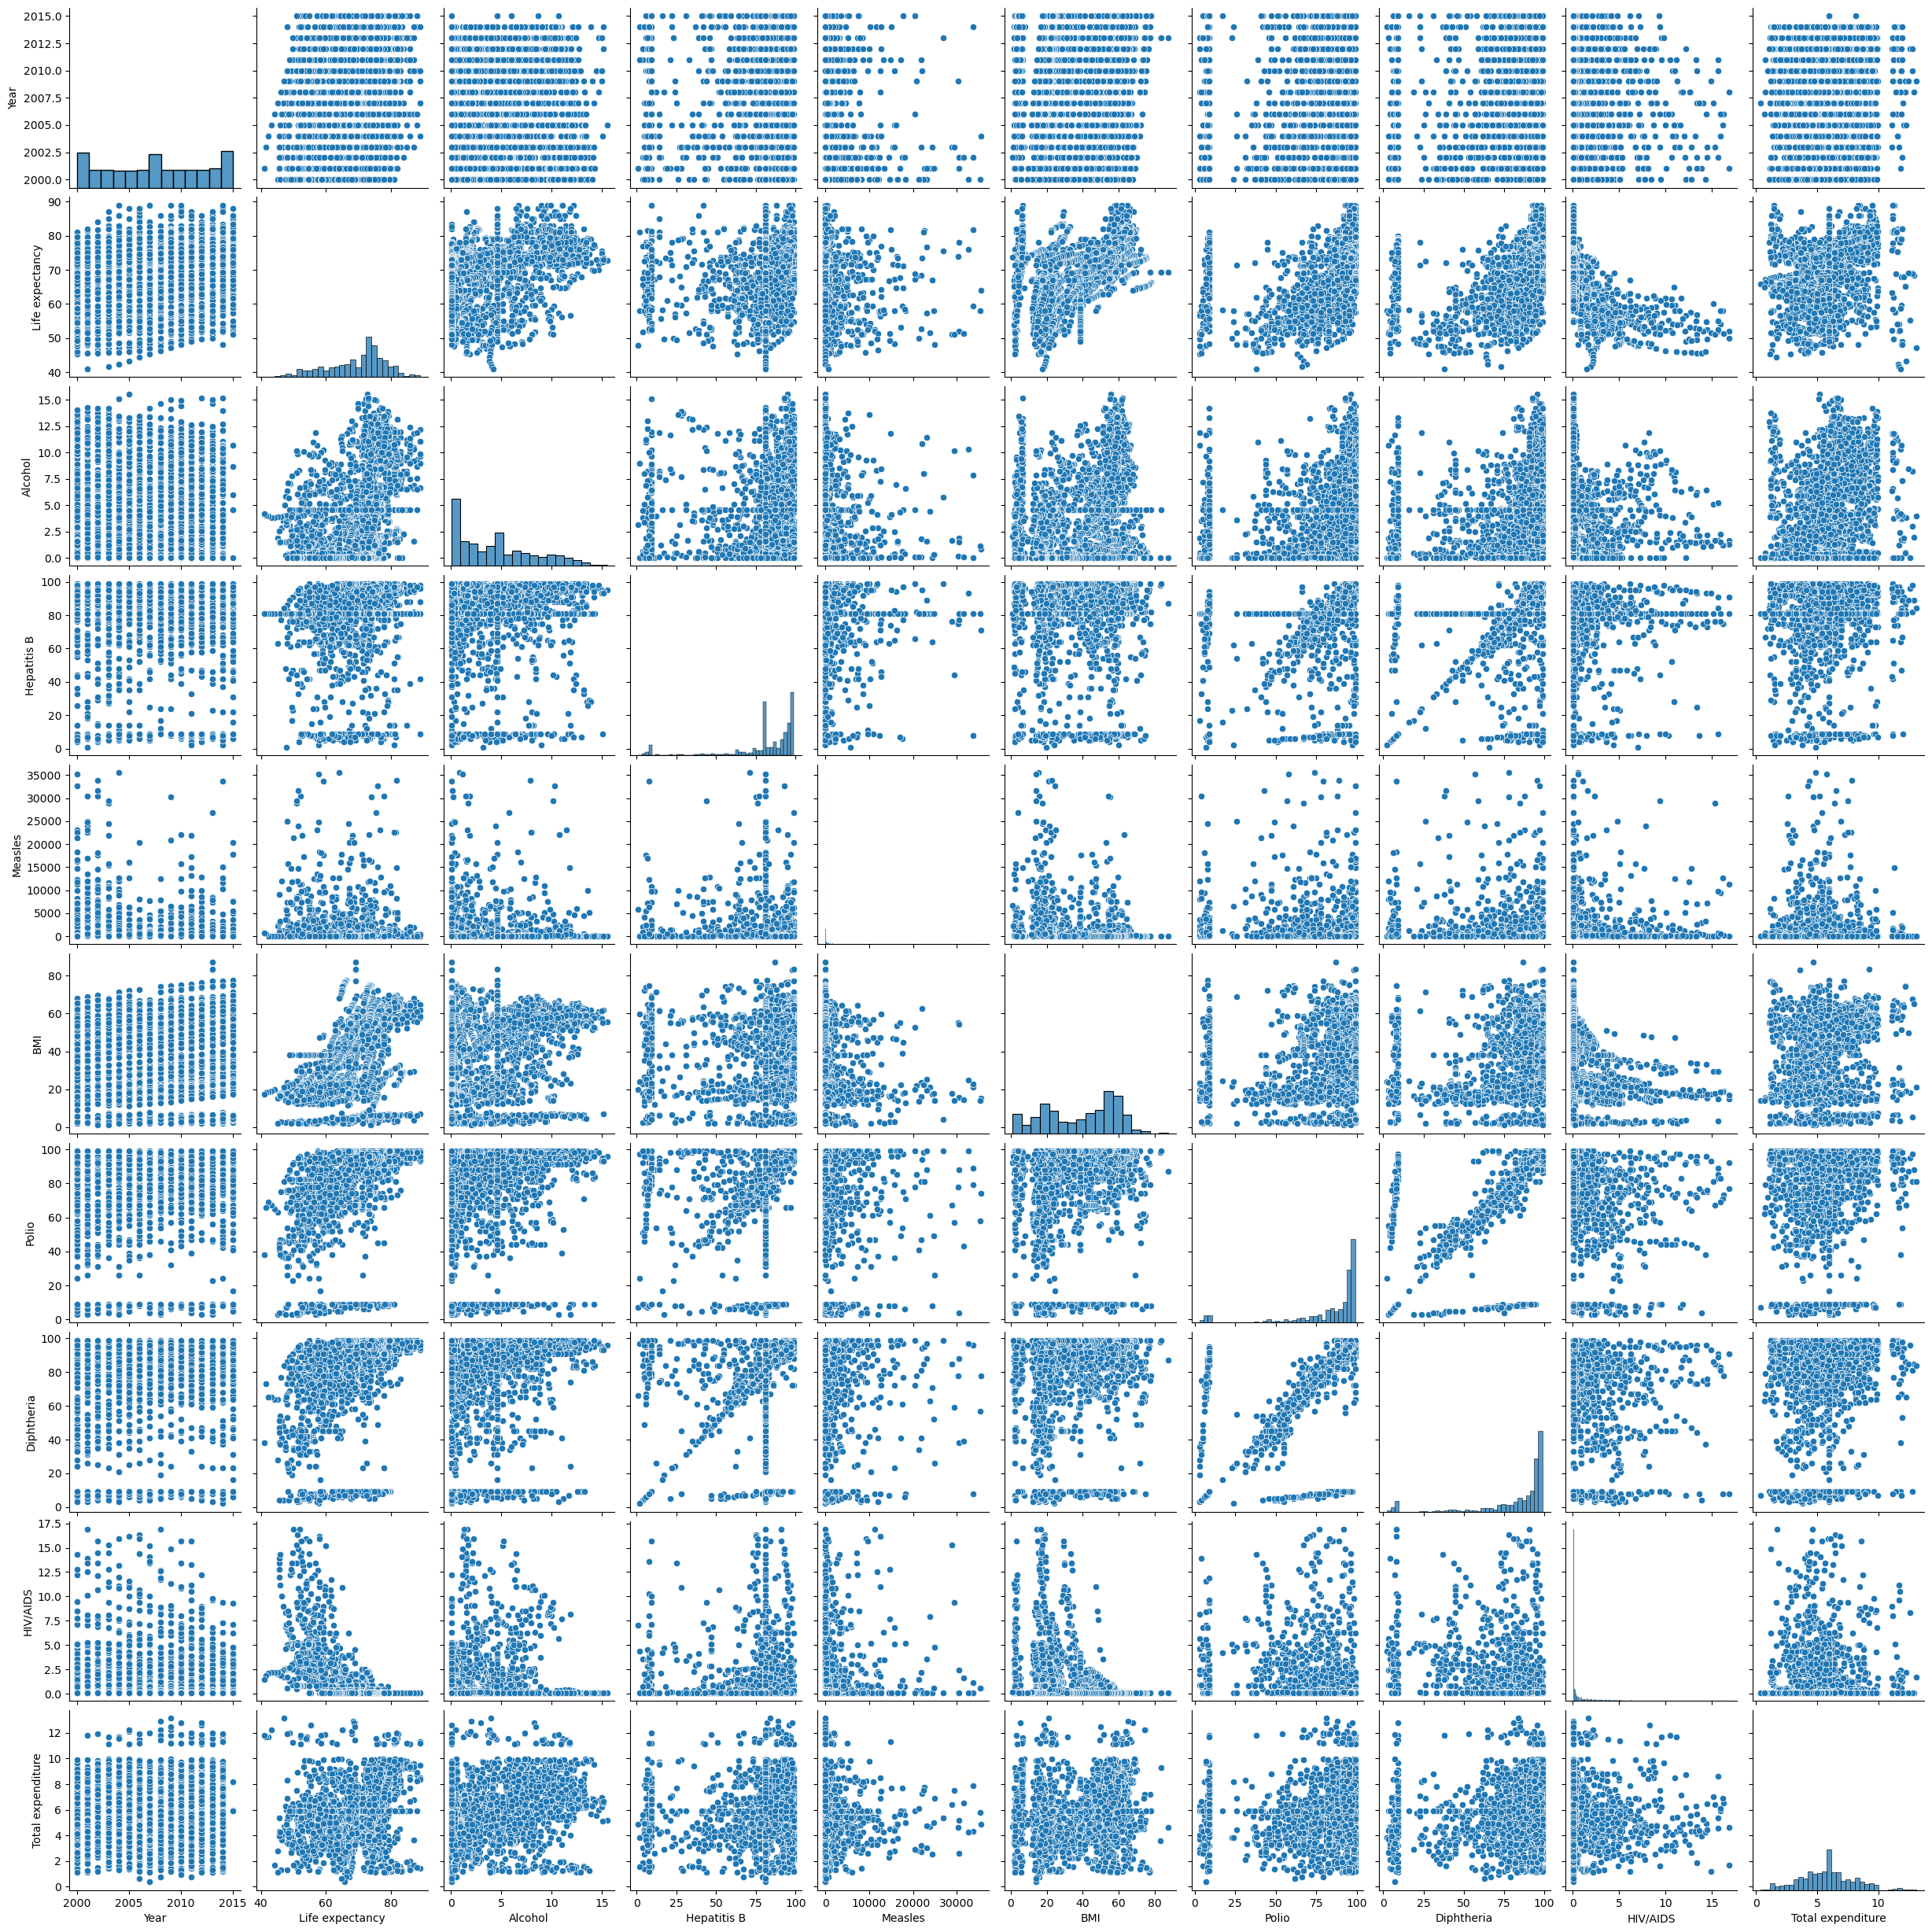

In [22]:
#Pairplot to visualize the relationship between different variables
#sns.pairplot(life_exp_df, vars=['Year', 'Life expectancy', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Total expenditure'])
#plt.show()

In [23]:
#drop Population column
life_exp_df = life_exp_df.drop('Population', axis=1)

In [24]:
#separate out "Life Expectancy" column for prediction
df_labels = life_exp_df['Life expectancy']
life_exp_df = life_exp_df.drop('Life expectancy', axis=1)

In [25]:
#Use binary encoding to convert the Country column
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['Country'])
life_exp_df = encoder.fit_transform(life_exp_df)

In [26]:
#Display the dataframe
life_exp_df.head()

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Year,Status,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,0,0,0,0,0,0,1,2015,Developing,...,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,0,0,0,0,0,0,0,1,2014,Developing,...,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,0,0,0,0,0,0,0,1,2013,Developing,...,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,0,0,0,0,0,0,0,1,2012,Developing,...,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
14,0,0,0,0,0,0,0,1,2001,Developing,...,122,35.0,7.80,33.0,0.1,117.496980,2.1,2.4,0.340,5.9


In [27]:
#Perform OneHotEncoding on the 'Status' column
life_exp_df = pd.get_dummies(life_exp_df, columns=['Status'], drop_first=True)

In [28]:
#Check the count of unique values in the 'Status' column
life_exp_df['Status_Developing'].value_counts()

Status_Developing
True     2191
False     408
Name: count, dtype: int64

### TASK 2: Model Training

Rationale behind model choice: Here, in this analysis, I have decided to choose linear regression model. This is beacuse it estimates the linear relationship between multiple predictive and responsive variables. Before trying to fit a linear model to the observed dataset, one should assess whether or not there is some sort of relationship between the variables. Of course, we have seen from our above exploratory analysis that, there is some visible correlation between certain factors. Predicting values or outcomes is made possible by identifying the relationship between the variables. Stated differently, the application of linear regression enables the prediction of new values from preexisting data. More specifically, the nature and degree of the relationship between a dependent variable and several distinct independent variables are ascertained through the application of linear regression. Hence, according to me, linear regression model holds to be the best one for training the data.

In [29]:
#Split the dataset into training set and test set
#We will use 80% of the dataset for training and 20% of the dataset for testing
X_train, X_test, y_train, y_test = train_test_split(life_exp_df, df_labels, test_size=0.2, random_state=1)

#Scale the data if necessary
#We will use StandardScaler from sklearn to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fit on training set only
scaler.fit(X_train)

#Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### TASK 3: Performance Evaluation

Mean Absolute Error: 2.658611436371379
Mean Squared Error: 13.112690291728946
Root Mean Squared Error: 3.6211448868733416


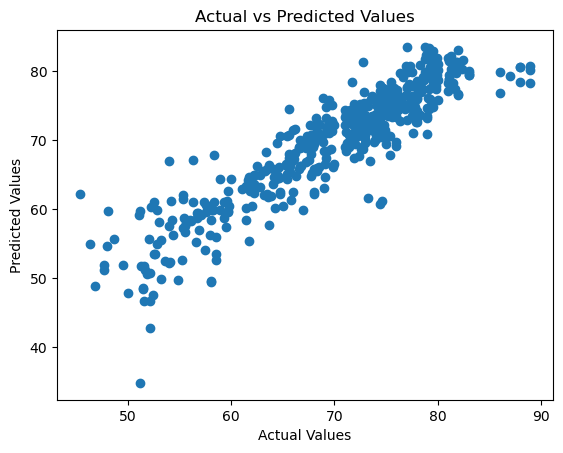

In [30]:
#Perform Regression Analysis

#Instantiate the Linear Regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the model
#We will use Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) as evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#Print the evaluation metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

#Plot the actual values against the predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Insights: The plot shows the relationship between actual and predicted values, indicating a model’s performance in predicting data. The model tends to anticipate lower values for lower actual values and higher values for higher actual values since there is a positive correlation between the actual and predicted values. Since most of the points are around the diagonal line, the model performs better for values around 70. Because there are more outliers and deviations from the line for values below 60 and beyond 80, the model's accuracy decreases. Because the majority of the points are below the diagonal line, the model tends to underestimate values. This indicates that the model is more cautious and conservative in its predictions, which may be because of how the model's parameters were chosen or how the data were structured.

### TASK 4: Analysis and Interpretation

In [33]:
#Evaluate Regression Model

#Calculate the R-squared value
r2 = metrics.r2_score(y_test, y_pred)
print('R-squared:', r2)

#Calculate the Adjusted R-squared value
n = X_test.shape[0] # number of observations
p = X_test.shape[1] # number of predictors
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print('Adjusted R-squared:', adjusted_r2)

#Calculate the Mean Squared Logarithmic Error (MSLE)
msle = metrics.mean_squared_log_error(y_test, y_pred)
print('Mean Squared Logarithmic Error:', msle)

#Calculate the Median Absolute Error (MedAE)
medae = metrics.median_absolute_error(y_test, y_pred)
print('Median Absolute Error:', medae)

print("The accuracy of our model is {}%".format(round(r2, 2) *100))

R-squared: 0.8292683984490657
Adjusted R-squared: 0.8198989812907828
Mean Squared Logarithmic Error: 0.0031693432017457905
Median Absolute Error: 2.036688403876859
The accuracy of our model is 83.0%


Insights based on Performance Evaluation Metrics: I have tested our model using a range of evaluation indicators to see how well it predicts values. Let us discuss one by one the various evaluation metrics applied in our model.

1) Mean Absolute Error(MAE): It calculates the absolute difference between actual and predicted values. A lower MAE indicates a better model fit, so our MAE of 2.65 shows that our model is very accurate.

2) Mean Squared Error(MSE): The MSE tells us how close a regression line is to a set of points. It finds the average of a set of errors. The closer your MSE value is to 0, the more accurate your model is. We have MSE value of 13.11, which could possibly mean the data points are dispersed widely around its central moment (mean), which tends to be obviously true because we have filled the missing values with the mean of the data.

3) Root Mean Squared Error(RMSE): RMSE provides an estimation of how well the model is able to predict the target value (accuracy). It measures the average difference between values predicted by a model and the actual values. We have RMSE value of 3.62, which indicates that the model fits the data well and has more precise predictions.

4) R-squared(R2): R2 determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model. R2 values above 0.7 or 0.8 are generally considered to be a reasonably good fit. As we have R2 of 0.82, it implies we have good fit of data for the model.

5) Adjusted R-squared: It is a modified version of R-squared that has been adjusted for the number of predictors in the model. Since, we have adjusted r-squared value of 0.81, which is supposed to be lower that r-squared in general, it's reasonably a good fit.

6) Mean Squared Logarithmic Error(MSLE): MSLE is the relative difference between the log-transformed actual and predicted values. MSLE value of 0.003, which is close to 0, indicates we have good fit model.

7) Median Absolute Error: It's the median difference between the observations (true values) and model output (predictions). We have the median absolute error of 2.03, which is lower, and hence the the model predicts better. 

A regression model can only predict values that are lower or higher than the actual value. As a result, the only way to determine the model’s accuracy is through residuals. Residuals are the difference between the actual and predicted values. So, the closer the residual is to zero, the better our model performs in making its predictions. We have attained an accuracy of 83% for our model, which indicates to be a good performing model.

### TASK 5: Visualization

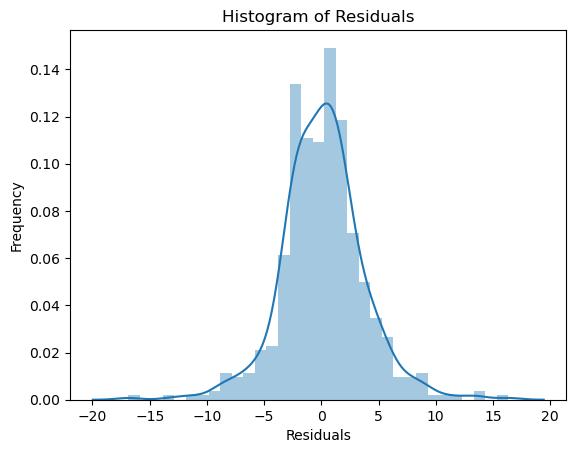

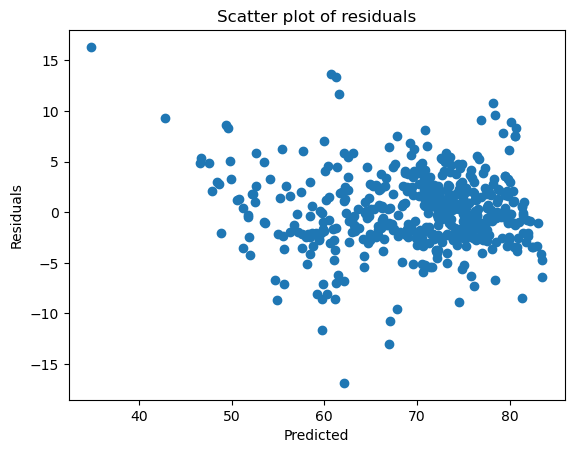

In [32]:
#Plotting residuals
residuals = y_test - y_pred
sns.distplot(residuals)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#Scatter plot of residuals
plt.scatter(y_pred, residuals)
plt.title('Scatter plot of residuals')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

Insights: The vertical distance between a point and the regression line is expressed as a residual. In a nutshell, it's the discrepancy between an expected value and an observed real value. The above plot represents a histogram of residuals, or the variations in a dataset's observed and projected values. The residuals' close resemblance to a normal distribution around zero suggests that the model that was employed to forecast these values was reasonably accurate. A small skewness to the right, on the other hand, raises the possibility that the forecasts are being impacted by outliers or systematic mistake. The model is unbiased and does not routinely overestimate or underestimate the values because the mean of the residuals is close to zero. Since the residuals' standard deviation is low, the majority of the data points in the model indicate that it is accurate and does not contain significant errors. Given that the histogram is bell-shaped and symmetric, the model assumptions are supported and the residuals have a normal distribution. A few bars on the histogram are distant from the center, indicating the presence of extreme residuals or outliers that have the potential to skew the model's performance. These could be from measurement errors, problems with the quality of the data, or unique situations that the model is unable to adequately represent.

### TASK 6: Improvement Strategies

Insights: The residuals scatter plot illustrates the correlation between the residuals and the predicted values. Heteroscedasticity is indicated by the apparent rise in residual variability that coincides with the expected value. This implies that the model's performance varies depending on the range of expected values. The model tends to overestimate low values and underestimate high values, as indicated by the positive correlation found between predicted values and residuals. Since the residuals' variance varies across different levels of expected values, the model cannot be said to be homoscedastic. This potentially compromises the model's validity by going against one of the tenets of linear regression. The residuals are more widely distributed for higher anticipated values than for lower projected values, as indicated by the funnel-shaped graphic. This can mean that some nonlinear relationship or interaction impact in the data is not being captured by the model. 

Based on the above insights, some possible improvements for the model are:
1) To make the outcome or the errors more like a normal curve and have less unequal spread, we can change their scale by taking their log or square root. This can help make the errors more consistent across different values of the outcome.
2) To represent the nonlinear relationship or the impact of several variables on the predicted variable, some explanatory variables or interaction terms may be added or subtracted. For instance, employing splines or polynomial regression could improve the data's fit.
3) Looking for outliers or significant points that might have a big influence on the model's performance and, if needed, eliminating or modifying them. Leverage plots and Cook's distance, for instance, can be used to find these locations.